# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_theme()

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Central limit theorem

In [3]:
def normalize(distribution, minimum, maximum):
    min_value, max_value = min(distribution), max(distribution)
    return (maximum - minimum) * (distribution - min_value) / (max_value - min_value) + minimum

In [4]:
def sampling(distribution, n_samples, size, statistic=np.mean, replace=True):
    return [statistic(np.random.choice(distribution, n_samples, replace=replace)) for _ in range(size)]

In [5]:
mean = 0
sigma = 1
size = 1000

distributions = [
    np.repeat(np.arange(1, 10), size / 10),
    np.random.normal(mean, sigma, size=size),
    np.random.beta(a=5, b=1, size=size),
    -np.sin(np.random.exponential(scale=1.0, size=size)),
    np.random.beta(a=0.2, b=0.2, size=size),
]
distributions[0] = normalize(distributions[0], minimum=-0.71, maximum=0.71)
distributions[1] = normalize(distributions[1], minimum=-1, maximum=1)
distributions[2] = normalize(distributions[2], minimum=-0.77, maximum=0.77)
distributions[3] = normalize(distributions[3], minimum=-0.73, maximum=0.73)
distributions[4] = normalize(distributions[4], minimum=-0.63, maximum=0.63)

colors = ['gold', 'orangered', 'limegreen', 'dodgerblue', 'deeppink']

In [6]:
n_samples = [1, 3, 10, 30, 100]

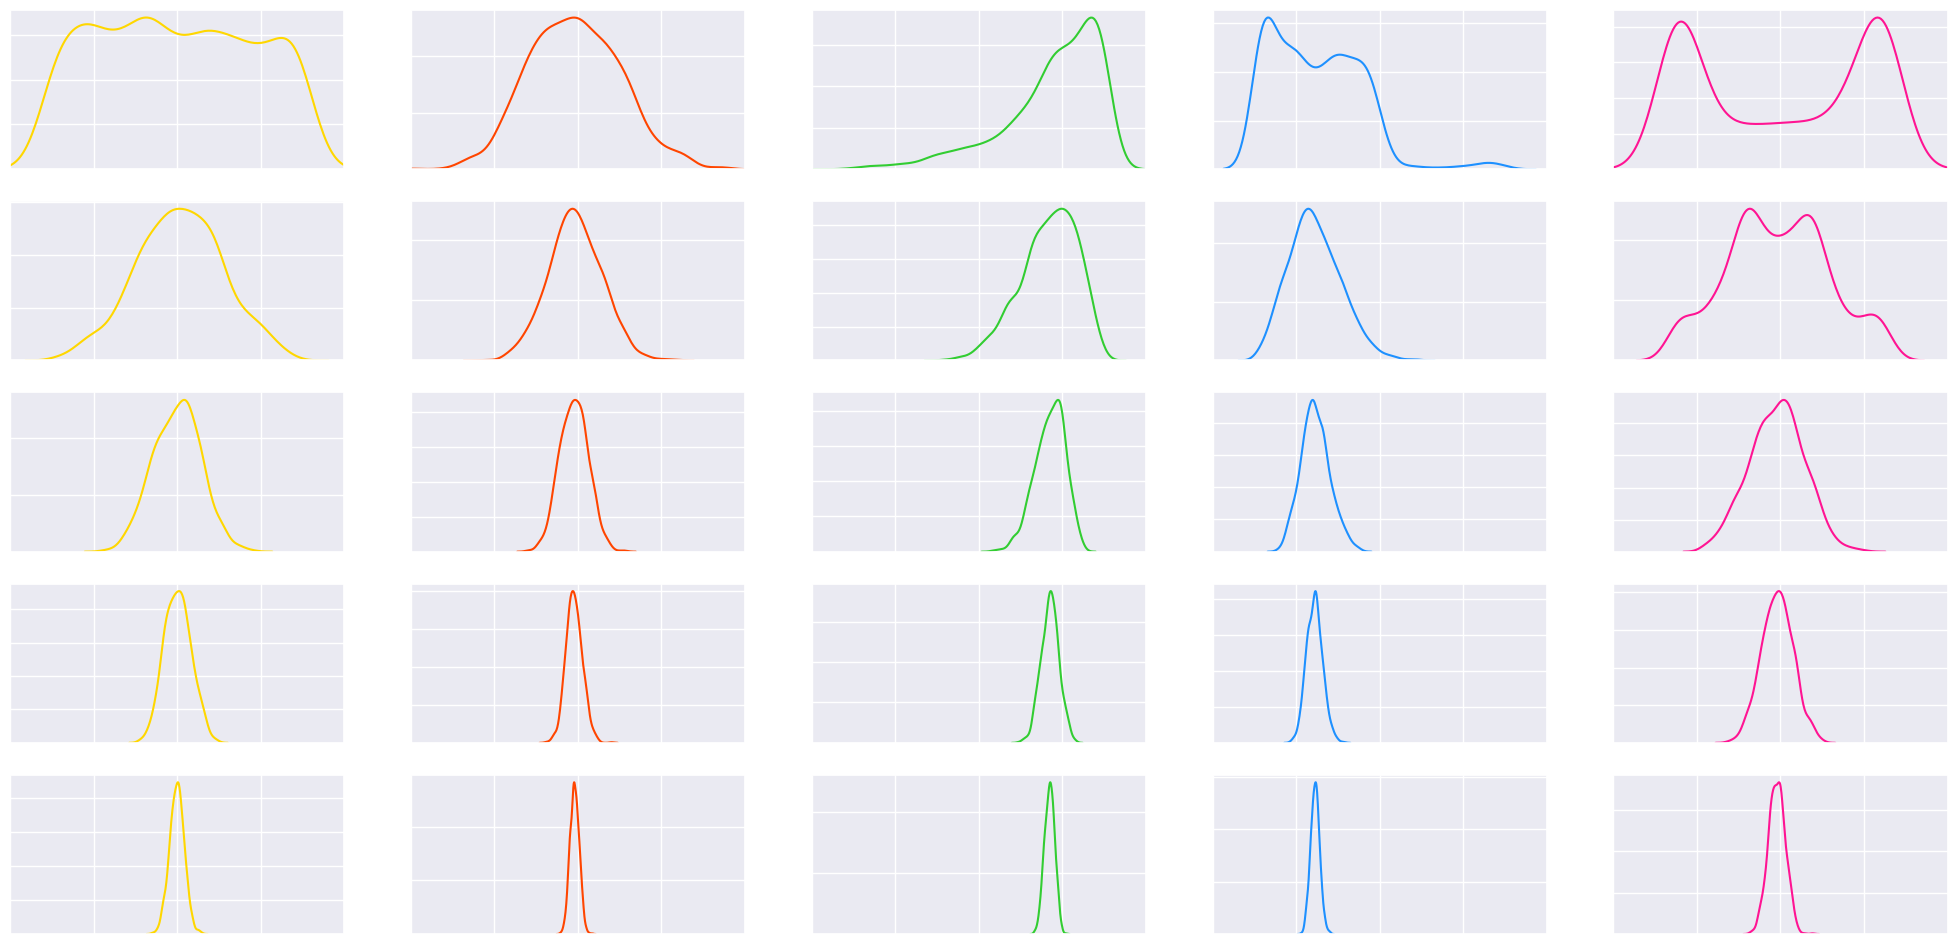

In [7]:
n = 1000
fig, axes = plt.subplots(len(n_samples), len(distributions), figsize=(25, 12))
for i, n_sample in enumerate(n_samples):
    for j, distribution in enumerate(distributions):
        replace = n_samples != 1
        mean_distribution = sampling(distribution, n_samples=n_sample, size=n, statistic=np.mean, replace=replace)
        axes[i][j].set_xlim(-1, 1)
        axes[i][j].xaxis.set_tick_params(labelbottom=False)
        axes[i][j].yaxis.set_tick_params(labelleft=False)
        sns.distplot(mean_distribution, ax=axes[i][j], rug=False, hist=False, color=colors[j])

# Bootstrap

In [8]:
data = [
    33, 37, 21, 27, 34, 33, 36, 46, 40, 25,
    40, 30, 38, 37, 38, 23, 19, 35, 31, 22,
    18, 24, 37, 33, 42, 25, 28, 38, 34, 43,
    20, 26, 32, 29, 31, 41, 23, 28, 36, 34
]
p = 0.95
function = np.median
function_name = 'median'

In [9]:
n = 10000
size = len(data)
datasets = [np.random.choice(data, size, replace=True) for _ in range(n)]

In [10]:
statistics = [function(dataset) for dataset in datasets]

In [11]:
lower_quantile = np.quantile(statistics, 1 - p)
upper_quantile = np.quantile(statistics, p)
print(f'{p * 100}% confidence interval for the {function_name}: ({lower_quantile:.3f}, {upper_quantile:.3f})')

95.0% confidence interval for the median: (29.500, 34.500)


Text(0.5, 1.0, '95.0% confidence interval for the median')

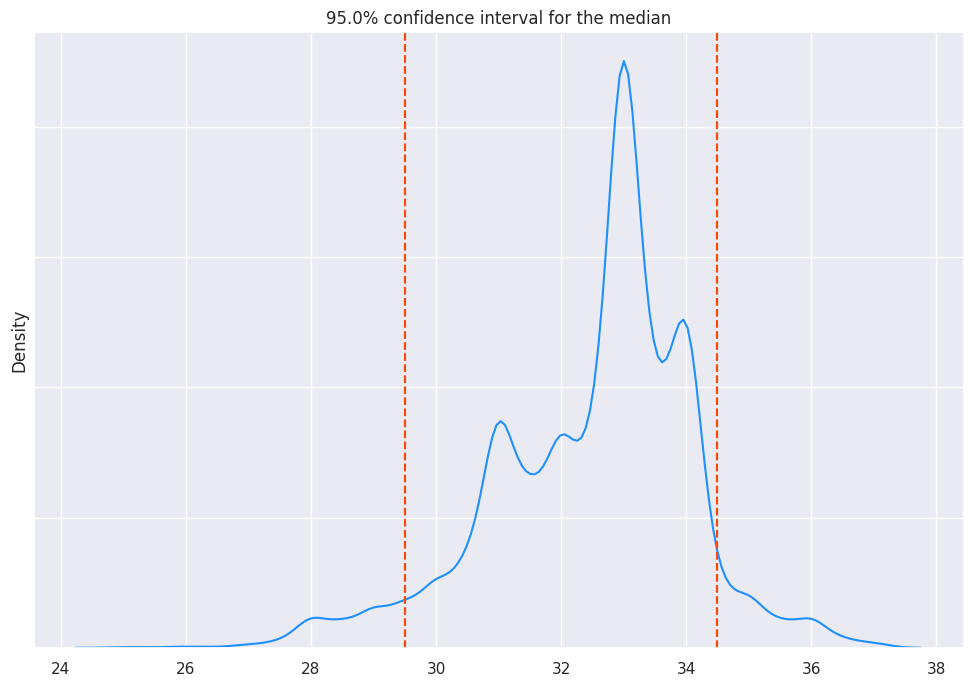

In [12]:
plt.figure(figsize=(12, 8))
ax = sns.distplot(statistics, rug=False, hist=False, color='dodgerblue')
ax.yaxis.set_tick_params(labelleft=False)
plt.axvline(lower_quantile, color='orangered', linestyle='--')
plt.axvline(upper_quantile, color='orangered', linestyle='--')
plt.title(f'{p * 100}% confidence interval for the {function_name}')